# Proyecto 13 - Luis Gutierrez

In [311]:
# Importar librerias

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

Tienes que:

- Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
- Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
- Analizar los factores que más impactan la pérdida.
- Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
    - identificar a los grupos objetivo;
    - sugerir medidas para reducir la rotación;
    - describir cualquier otro patrón que observes con respecto a la interacción con los clientes.


In [312]:
# Importar dataset

df = pd.read_csv('gym_churn_us.csv')

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [314]:
df.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2661,0,1,1,0,1,6,0,26,238.048765,6.0,2,3.796494,3.815190,0
2423,1,1,1,1,1,6,0,31,75.487308,6.0,11,2.514546,2.554718,0
690,0,1,0,0,0,6,0,28,103.758303,6.0,5,0.506350,0.436155,0
3286,0,1,1,1,1,1,0,29,2.665016,1.0,0,2.268732,1.719708,1
2471,1,1,1,0,1,12,0,26,281.299254,12.0,0,1.746901,1.075902,1
1365,0,1,1,1,1,12,0,29,50.864460,5.0,1,3.527583,3.473861,0
759,1,0,1,0,1,1,0,24,61.484172,1.0,3,0.000000,0.000000,0
806,1,1,0,0,1,1,0,23,215.930003,1.0,4,1.283945,0.599889,1
3400,1,1,1,1,0,6,0,27,106.282331,6.0,5,2.614065,2.667068,0
3705,0,1,0,0,1,1,0,29,60.885977,1.0,5,0.000000,0.000000,1


In [315]:
# Estandarizar columnas a lowercase

df.columns = [col.lower() for col in df.columns]

- Por lo pronto, no parece haber valores ausentes ni datatypes erróneos.

## EDA

In [316]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- Encontramos varios puntos aquí, entre ellos:

    - Parece ser que mucha gente está cerca del gimnasio
    - La tendencia de duracion de las suscripciones es de 3 a 6 meses (aparentemente)
    - La edad promedio es más alto de lo que esperaba, casi 30 años.
    - Hay un valor bastante alto en el lifetime de los usuarios, habría que ver qué tan común es tener usuarios con esa antigüedad.

In [317]:
# Dividir el dataset en personas que se fueron vs personas que siguen activas

df_active = df[df['churn'] == 0]

df_churn = df[df['churn'] == 1]

In [318]:
df_active.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


In [319]:
df_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


- Parecería ser que las personas que entraron por referencia de un amigo, se mantienen más en el gimnasio.
- Igual, como es de esperar un tanto, las personas que tienen un periodo de contrato mayor, se mantienen activos en el gimnasio, mientras que las otras persoans con tiempos de contrato menores, probablemente ya llegaron a su mes de terminación.
- Igual por la columna de edad, da la impresión que la gente joven es quien suele irse antes del gimnasio.
- Las cancelaciones parecen ser mayormente de personas que intentaron 1 mes el gimnasio y después se fueron, la columna Lifetime nos da a entender eso

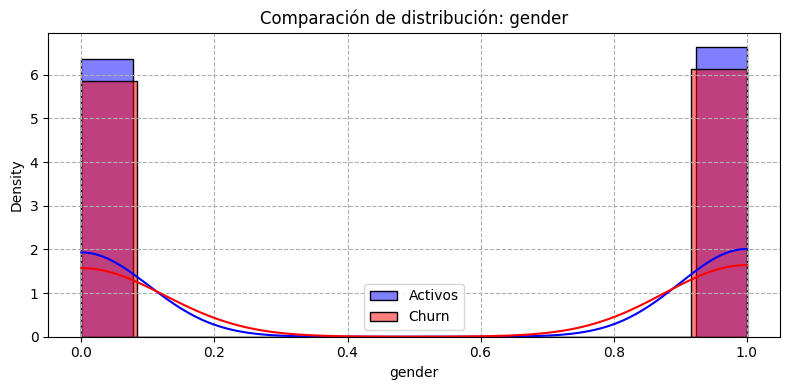

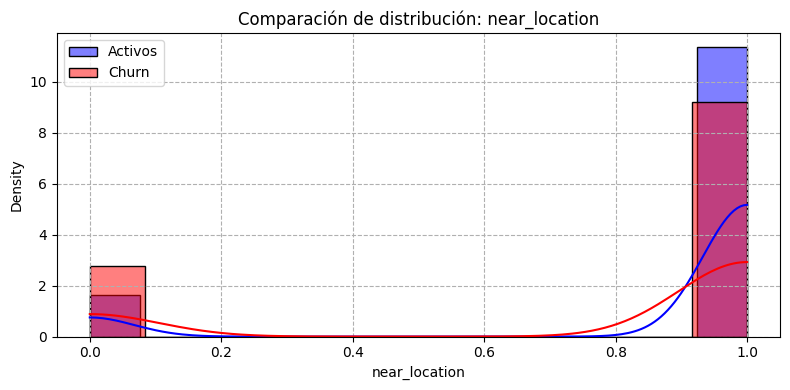

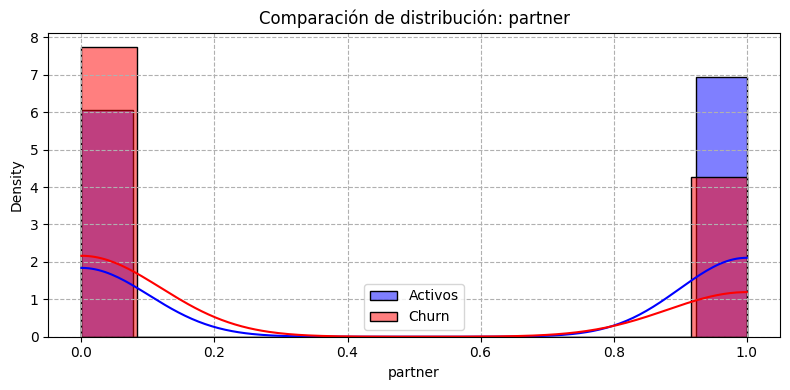

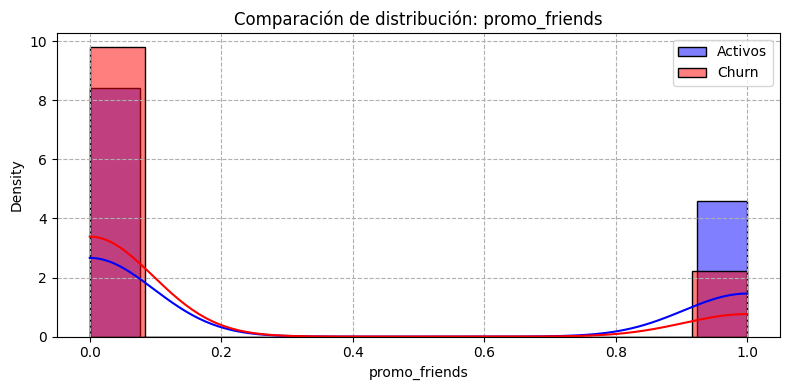

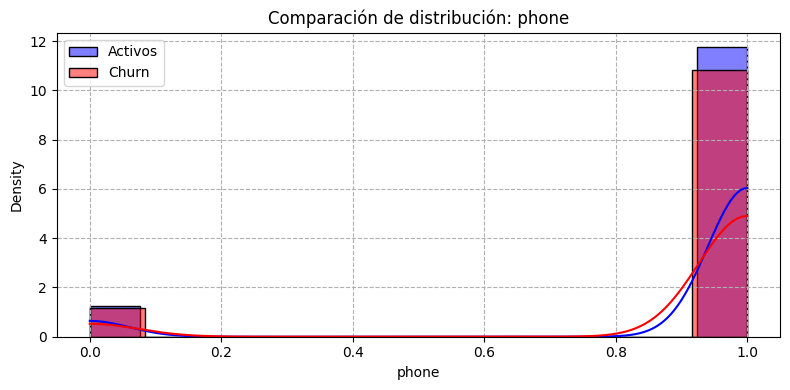

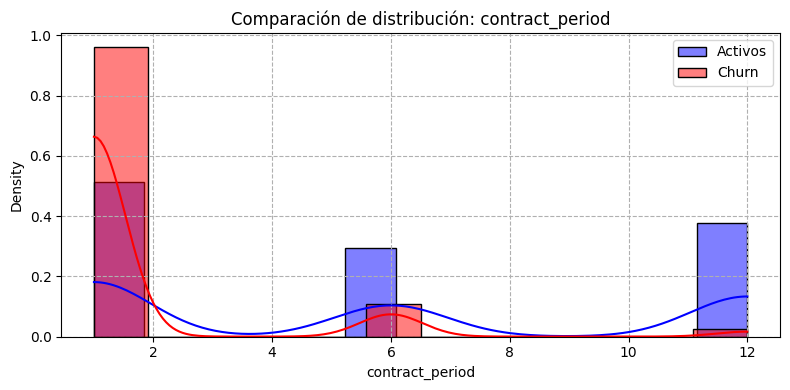

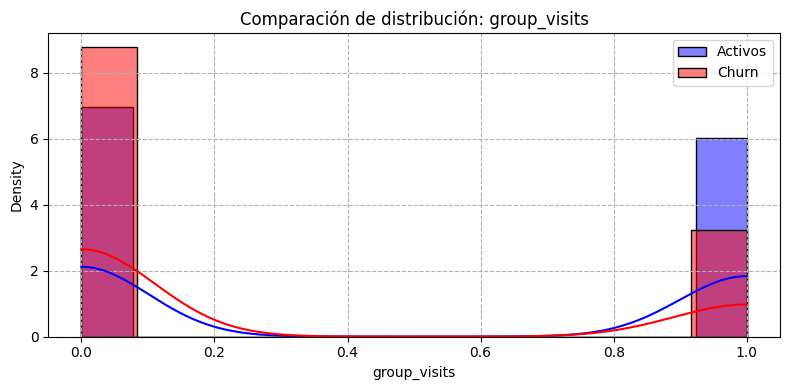

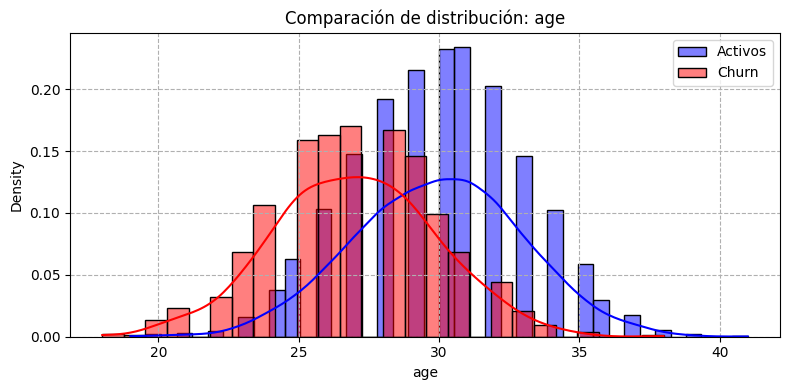

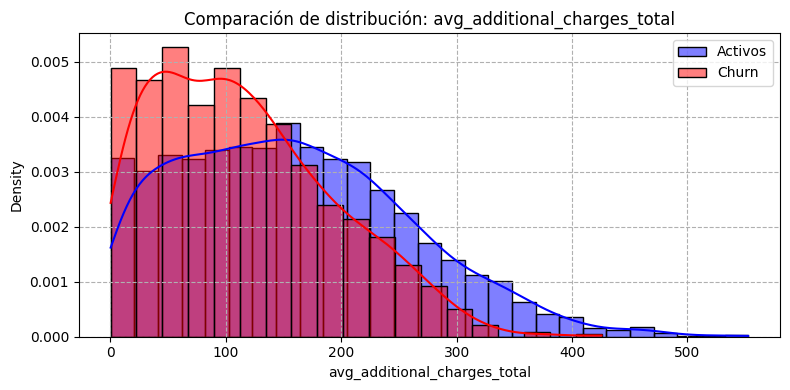

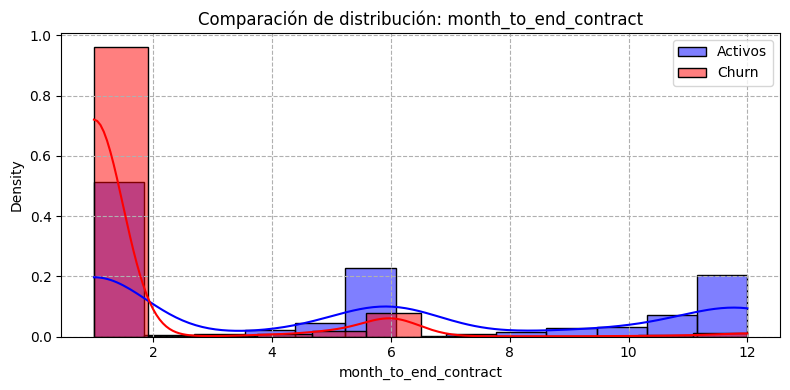

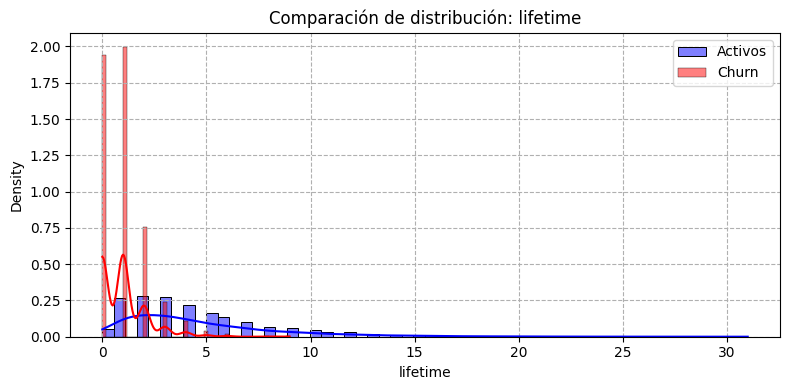

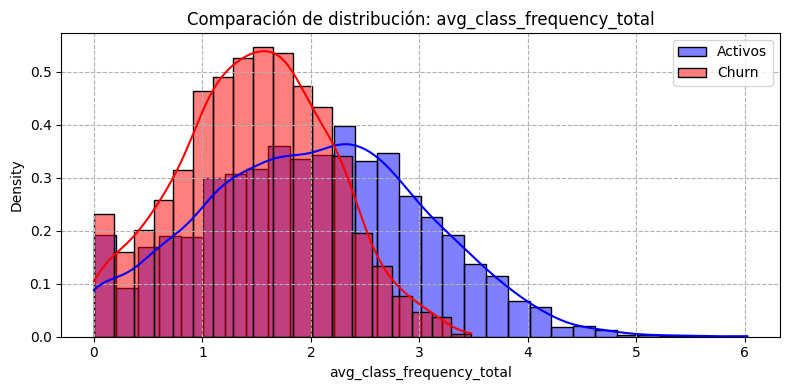

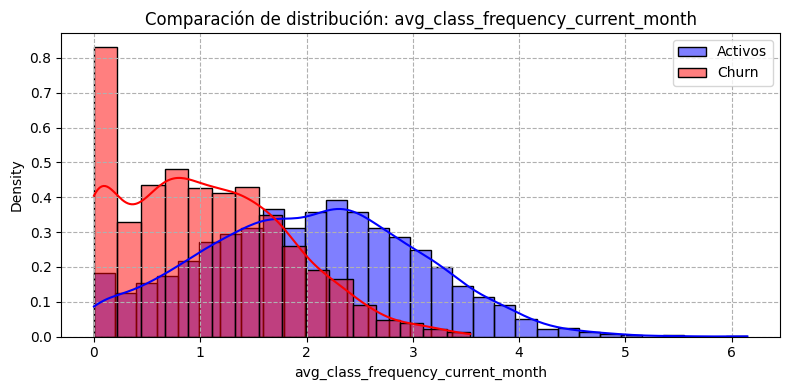

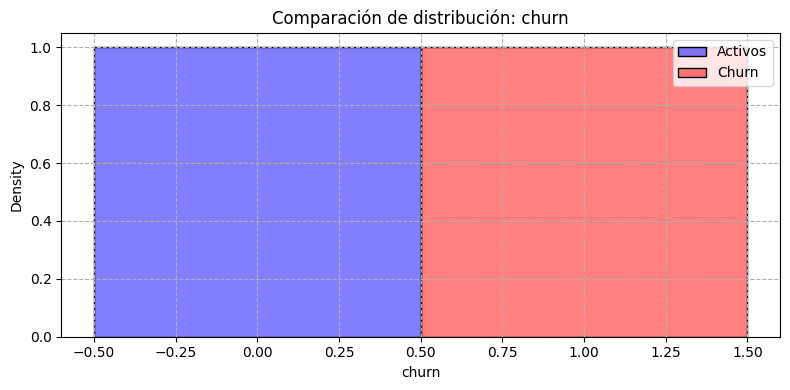

In [320]:
# Graficar distribuciones para observar comportamiento

for col in df_active.columns:
    plt.figure(figsize=(8, 4))
    
    sns.histplot(df_active[col], kde=True, color='blue', label='Activos', stat='density', alpha=0.5)
    sns.histplot(df_churn[col], kde=True, color='red', label='Churn', stat='density', alpha=0.5)

    plt.title(f'Comparación de distribución: {col}')
    plt.legend()
    plt.grid(linestyle='--')
    plt.tight_layout()
    plt.show()

- Confirmamos que la gente que está lejos del gimnasio tiene tendencia a cancelar
- Confirmamos que la gente asociada por empresa se mantiene más
- Confírmamos que la gente que entra por referencia de algún amigo, se mantiene activa
- Confirmamos que la gente que suele irse es aquella que tiene suscripciones de 1 mes 
- La gente que participa en grupos tiene tendencia a permanecer en el gimnasio
- La gente que tiene tendencia a irse, es la gente joven
- Parece ser que hay mucha gente que gasta poco en otros servicios del gimnasio y que tienden a cancelar el servicio
- La gente que visita el gimnasio 1 o 2 veces por semana, tiene fuertes tendencias a irse

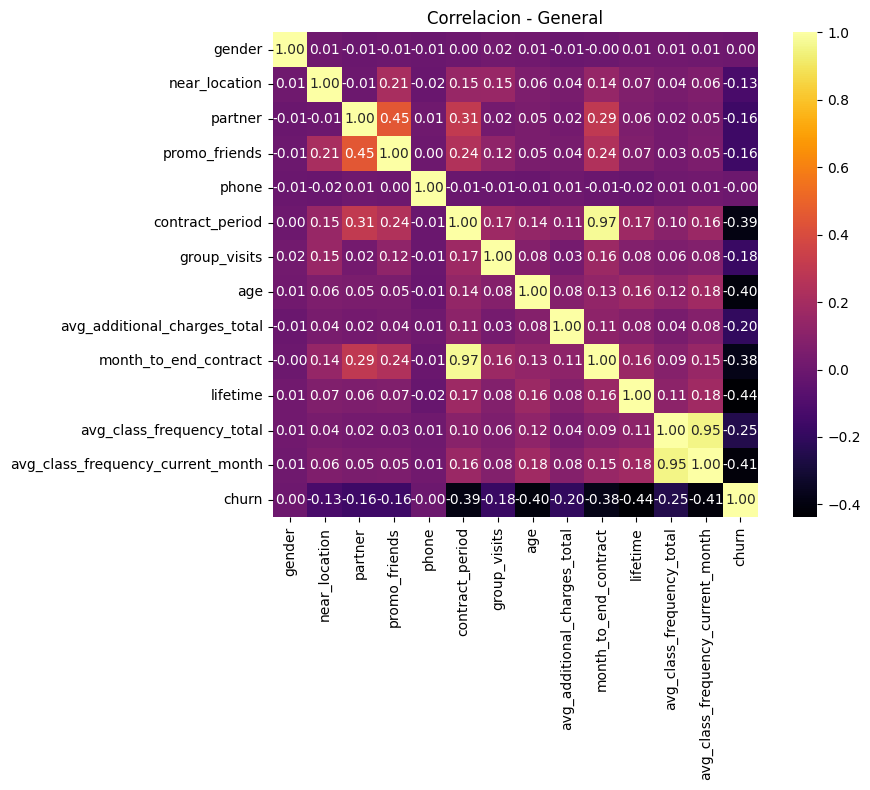

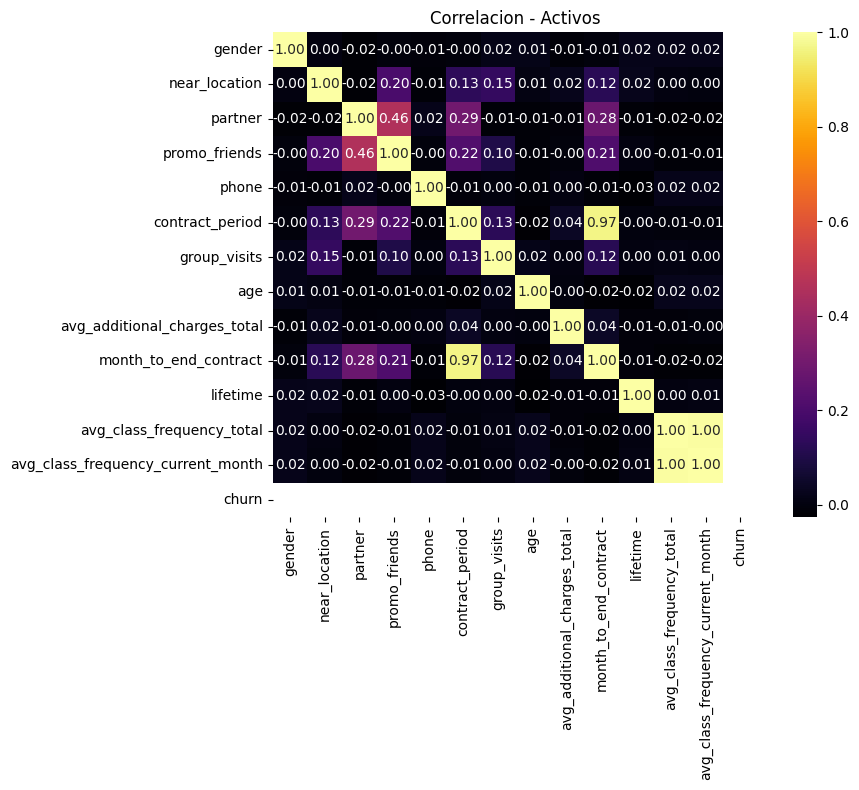

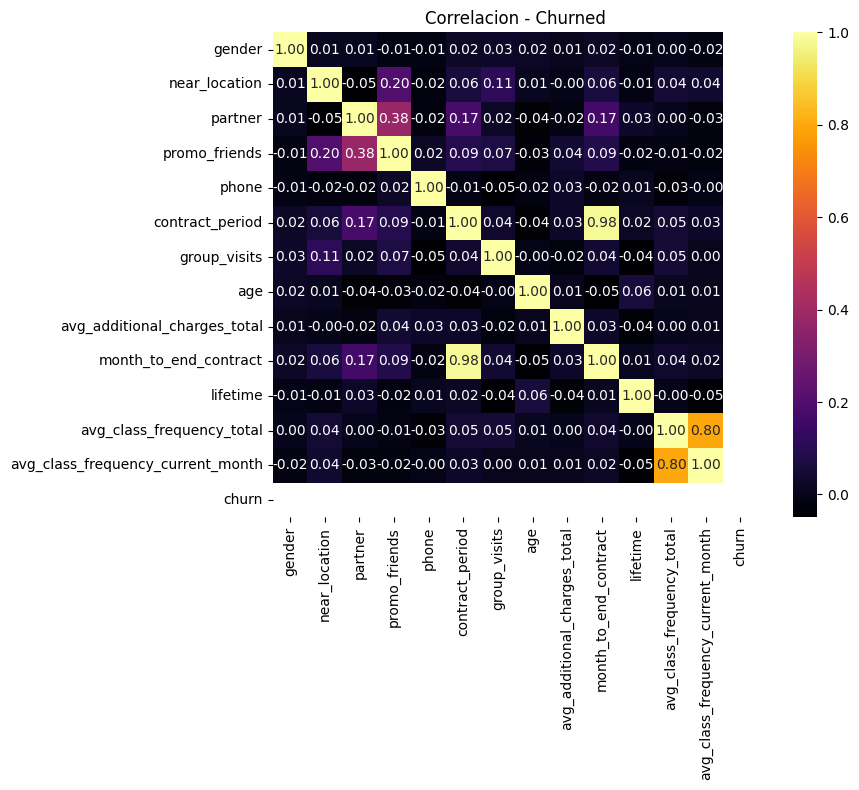

In [321]:
# Matriz de correlacion

corr_general = df.corr()
corr_active = df_active.corr()
corr_churn = df_churn.corr()

corr_list = [corr_general, corr_active, corr_churn]
tags = ['General','Activos','Churned']

for tag, c in zip(tags, corr_list): 
    plt.figure(figsize=(10,8))
    sns.heatmap(c, 
            annot=True,
            fmt='.2f',
            cmap='inferno',
            square='True'
            )
    plt.title(f'Correlacion - {tag}')
    plt.tight_layout()
    plt.show()

- Parecería ser que deberíamos tener cuidado con la variable "avg_class_frequency_total", pues está fuertemente ligada a nuestro target 'churn'

## Modelo de predicción - Regresión Logistica

In [322]:
# División de datos

# Separar target del resto

X = df.drop(['churn'], axis= 1)

y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Estandarizar datos fuera de rango

cols_to_scale = ['contract_period', 'age', 'avg_additional_charges_total',
                 'month_to_end_contract', 'lifetime',
                 'avg_class_frequency_total', 'avg_class_frequency_current_month']

X_train_st = X_train.copy()
X_test_st = X_test.copy()

# Estandarizar solo esas columnas
scaler = StandardScaler()
X_train_st[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_st[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Escalar el dataset sin churn para pasos posteriores

X_scaled = X.copy()
X_scaled[cols_to_scale] = scaler.transform(X[cols_to_scale])

# Elegir modelo

model1 = LogisticRegression()
model1.fit(X_train_st, y_train)

# Realizar predicciones

predictions1 = model1.predict(X_test_st)

# Revisar metricas

print("Accuracy:", accuracy_score(y_test, predictions1))
print("Precision:", precision_score(y_test, predictions1))
print("Recall:", recall_score(y_test, predictions1))
print("F1 Score:", f1_score(y_test, predictions1))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, predictions1))


Accuracy: 0.92375
Precision: 0.8586387434554974
Recall: 0.8282828282828283
F1 Score: 0.8431876606683805

Matriz de confusión:
[[575  27]
 [ 34 164]]


## Modelo de predicción - Random Tree Forest

In [323]:
model2 = RandomForestClassifier()
model2.fit(X_train_st, y_train)

predictions2 = model2.predict(X_test_st)

# Revisar metricas

print("Accuracy:", accuracy_score(y_test, predictions2))
print("Precision:", precision_score(y_test, predictions2))
print("Recall:", recall_score(y_test, predictions2))
print("F1 Score:", f1_score(y_test, predictions2))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, predictions2))

Accuracy: 0.91875
Precision: 0.8481675392670157
Recall: 0.8181818181818182
F1 Score: 0.8329048843187661

Matriz de confusión:
[[573  29]
 [ 36 162]]


- Observamos que el modelo de Regresión Logística funcionó mejor aquí, tuvo más aciertos en el target 'Churn'

## Clústeres

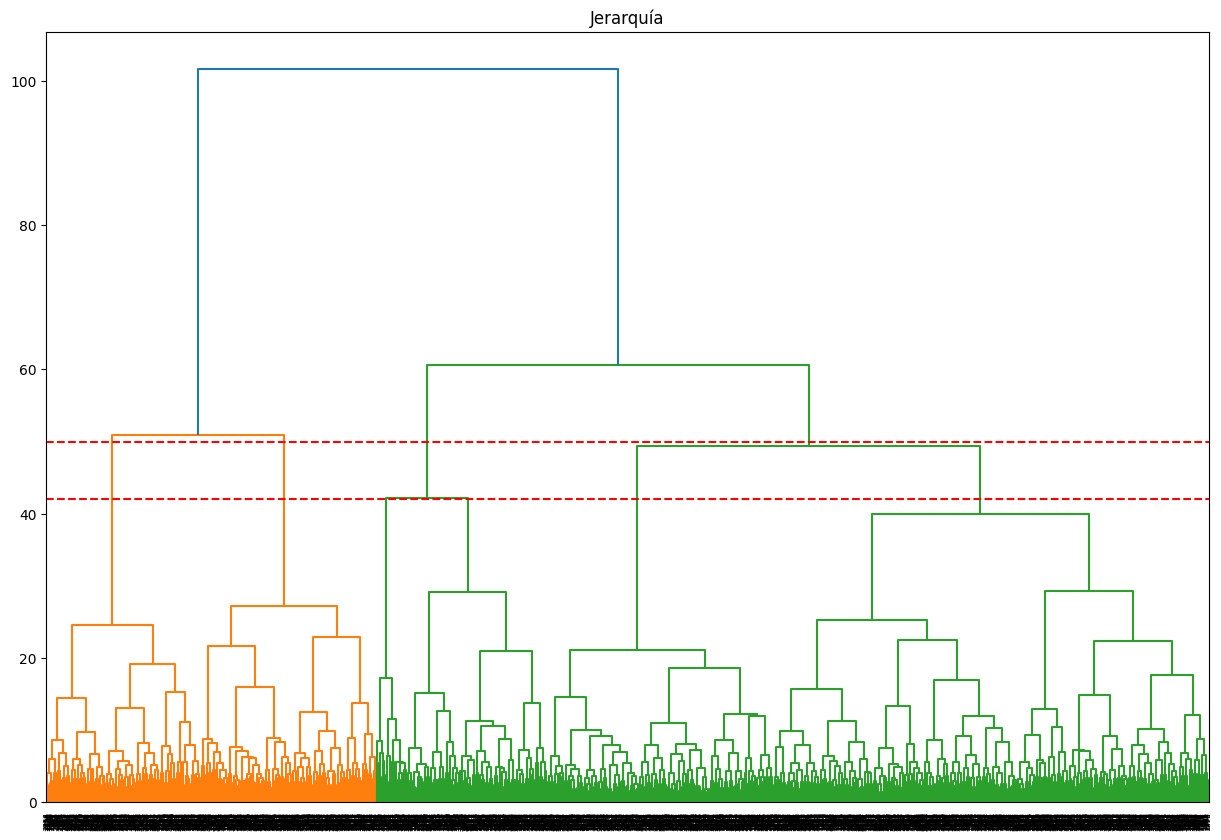

In [324]:
# Trazar dendograma

linked = linkage(X_train_st, method='ward')

plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Jerarquía')
plt.axhline(y=50, color = 'red', linestyle='--')
plt.axhline(y=42, color = 'red', linestyle='--')
plt.show()


Aquí podemos visualizar por qué estaremos utilizando 5 clústeres para este dataset en particular.

In [325]:
# Asignar cluster a cada cliente y agregarlo al dataframe general

km = KMeans(n_clusters= 5)
labels = km.fit_predict(X_scaled)

df['cluster'] = labels

# Valores promedio agrupados por cluster

df_clusters_mean = df.groupby('cluster').mean()
df_clusters_mean

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.511747,0.779367,0.365679,0.201226,0.912155,1.704801,0.306435,25.896834,108.670339,1.642492,1.516854,1.388850,1.059019,0.744637
1,0.509868,0.930921,0.722588,0.490132,0.903509,11.980263,0.541667,29.808114,164.215485,10.961623,4.257675,1.984751,1.975749,0.025219
2,0.543249,0.847046,0.428270,0.285865,0.908228,2.861814,0.422996,30.043249,157.204289,2.681435,3.535865,2.912526,2.903121,0.090717
3,0.466817,0.817773,0.448819,0.267717,0.902137,2.624297,0.368954,31.070866,159.923443,2.453318,2.922385,1.188628,1.065282,0.250844
4,0.533088,0.878676,0.459559,0.297794,0.860294,3.985294,0.463235,29.764706,148.604854,3.540441,13.165441,1.943149,1.949822,0.000000


- Observamos mucha diferencia en las columnas de partner, contract period, age, aditional charges, lifetime(de esperar), y sin duda, churn.

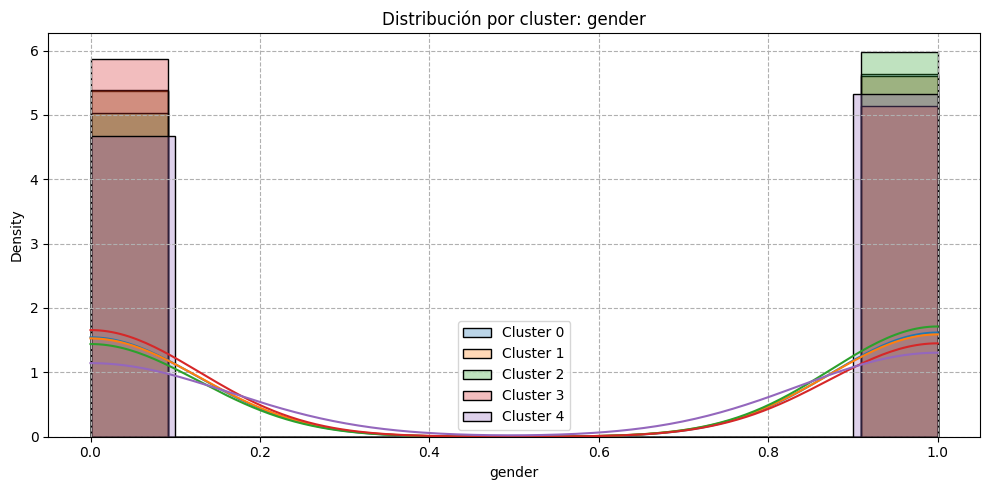

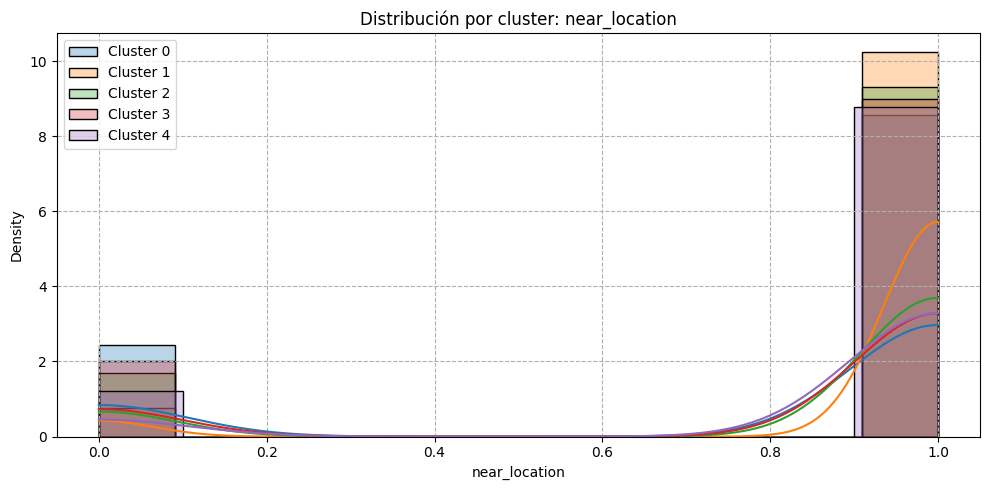

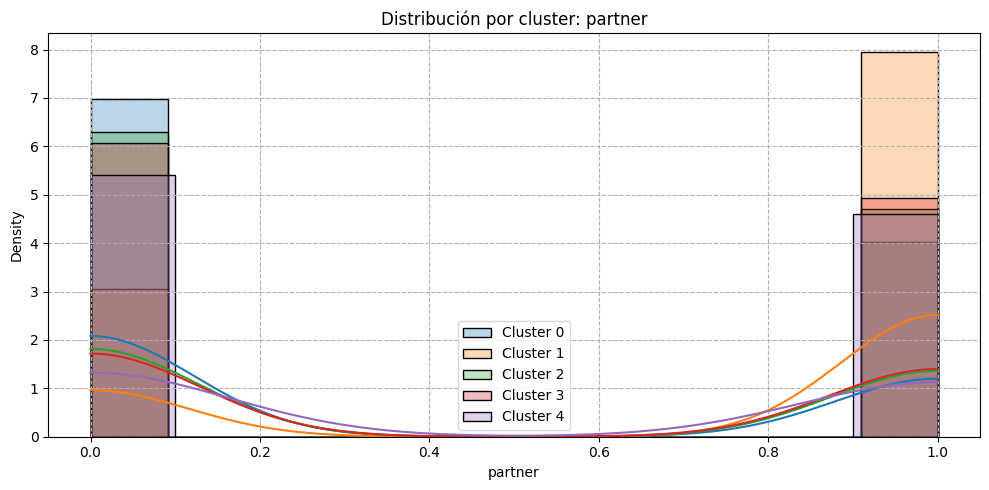

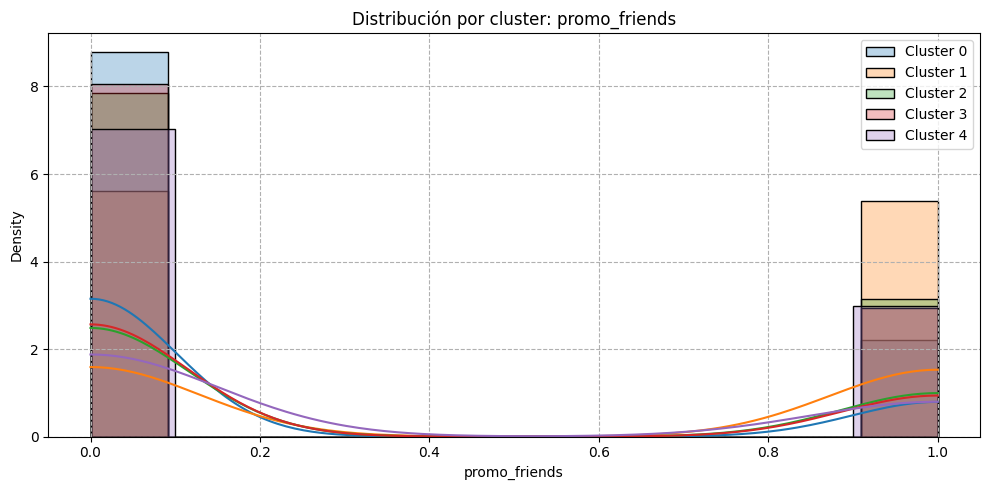

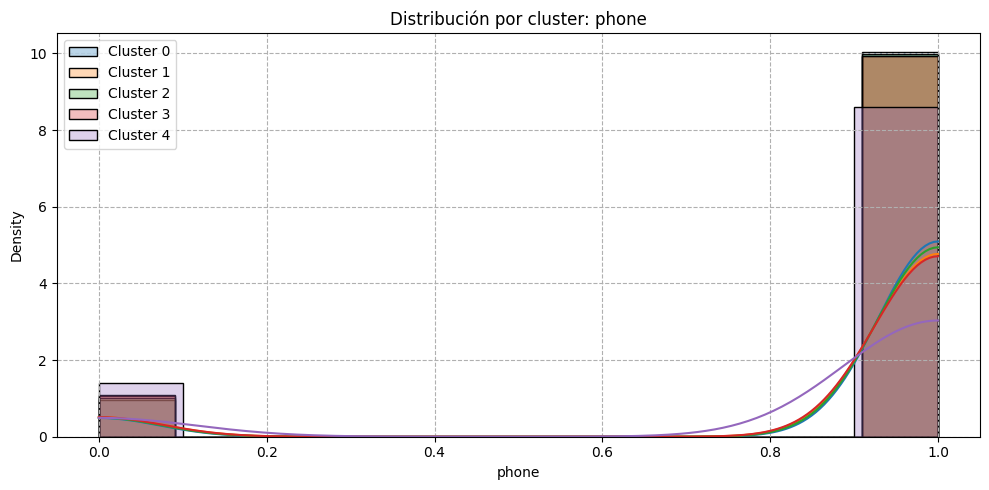

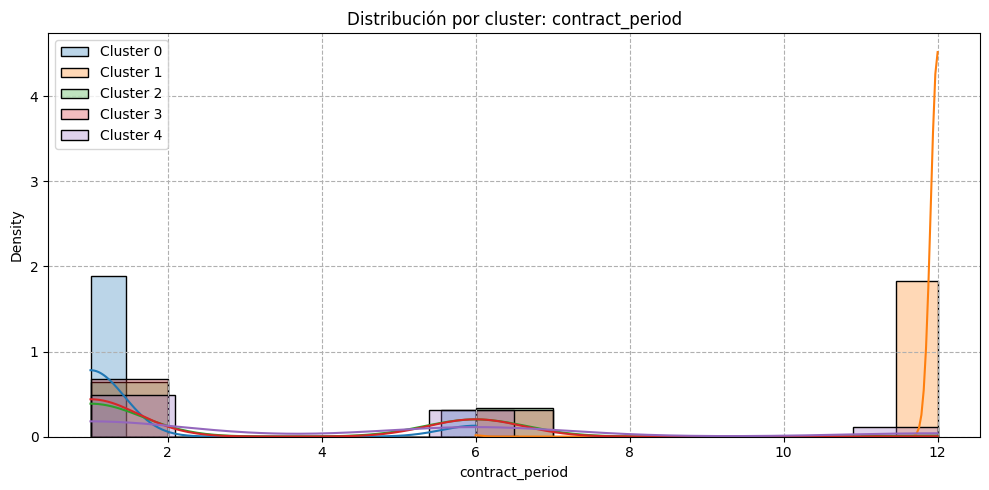

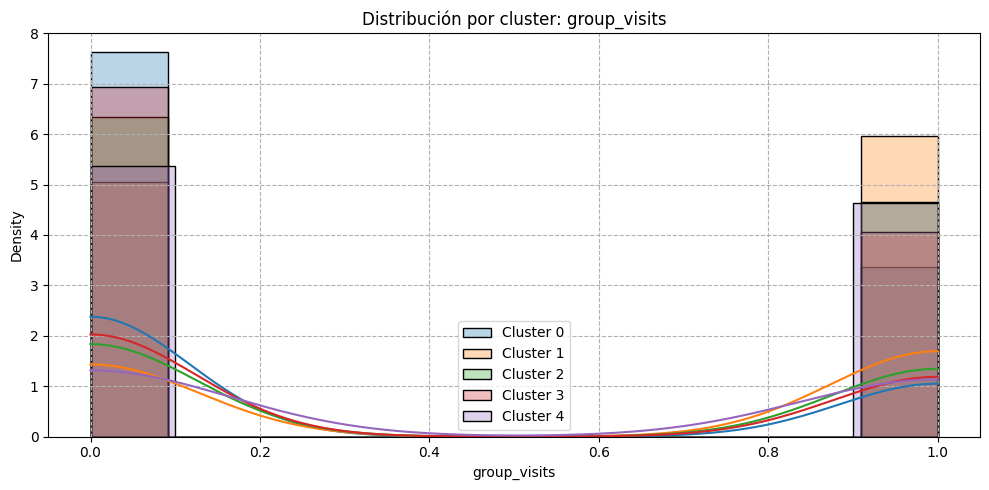

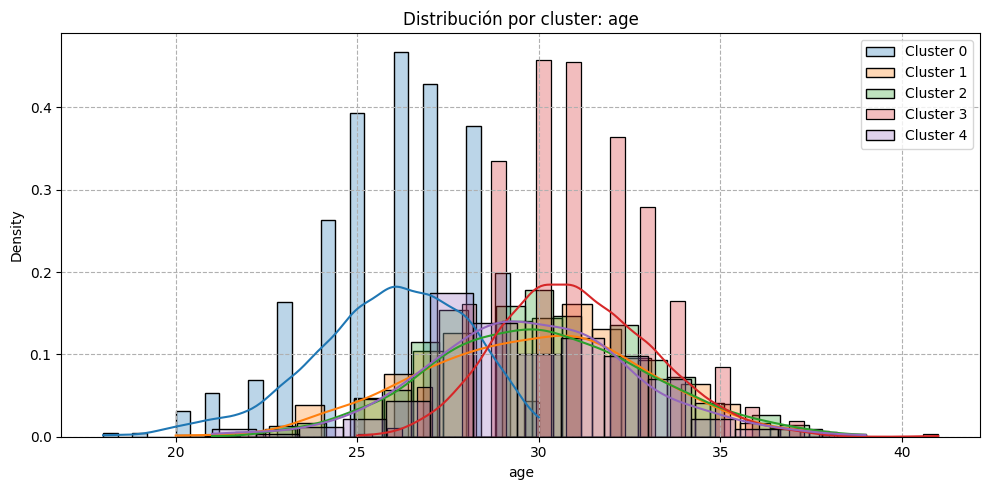

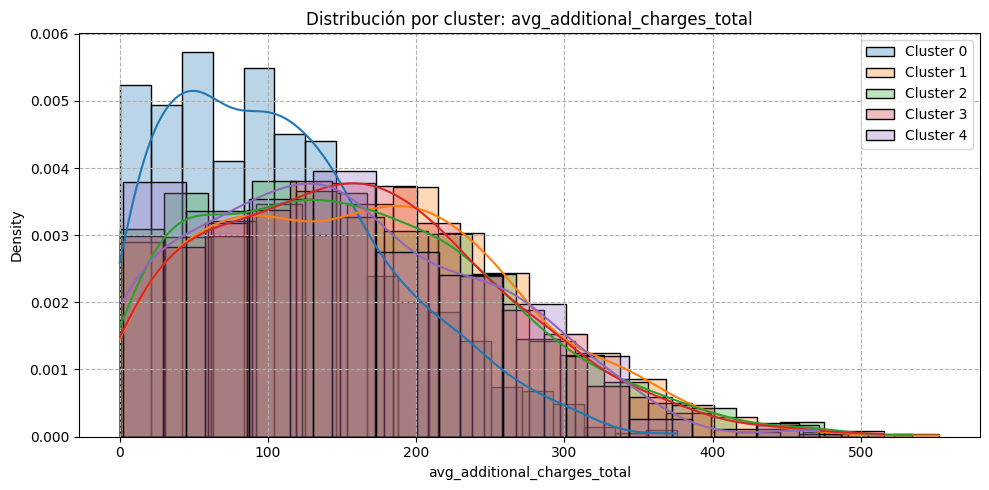

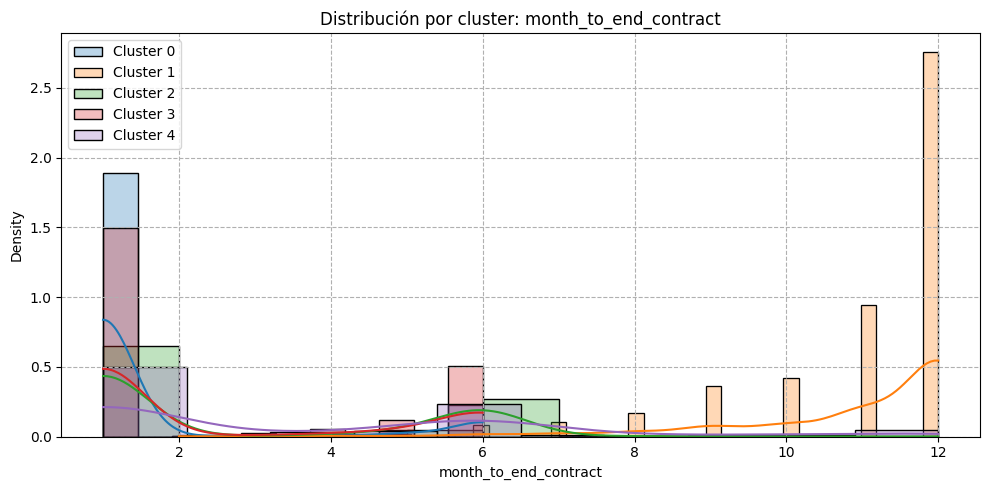

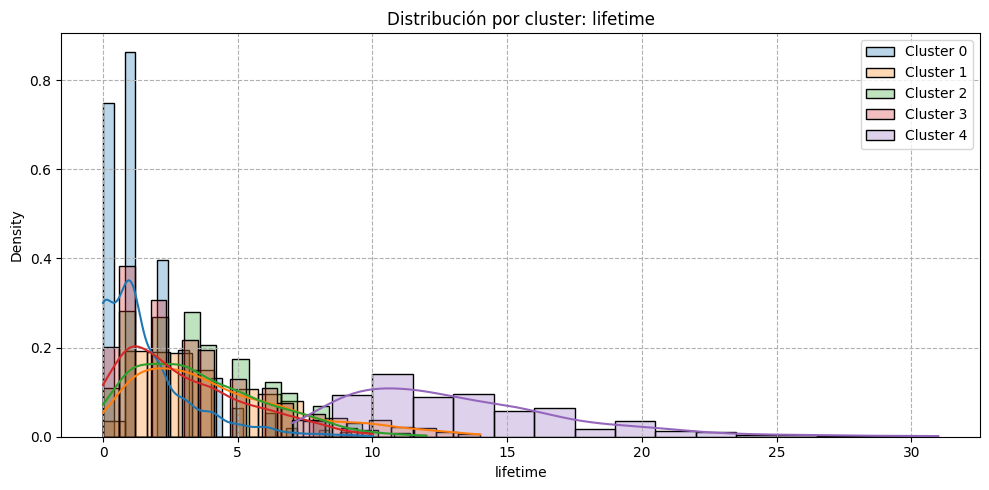

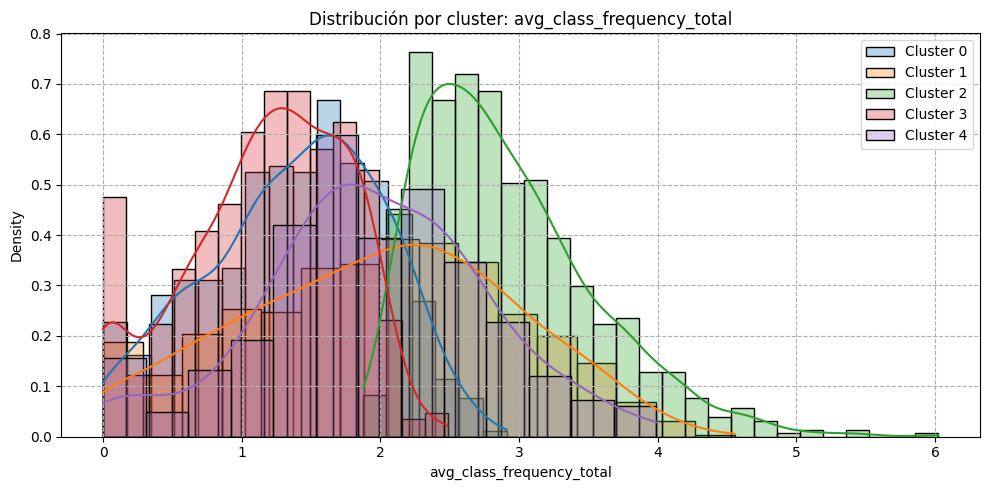

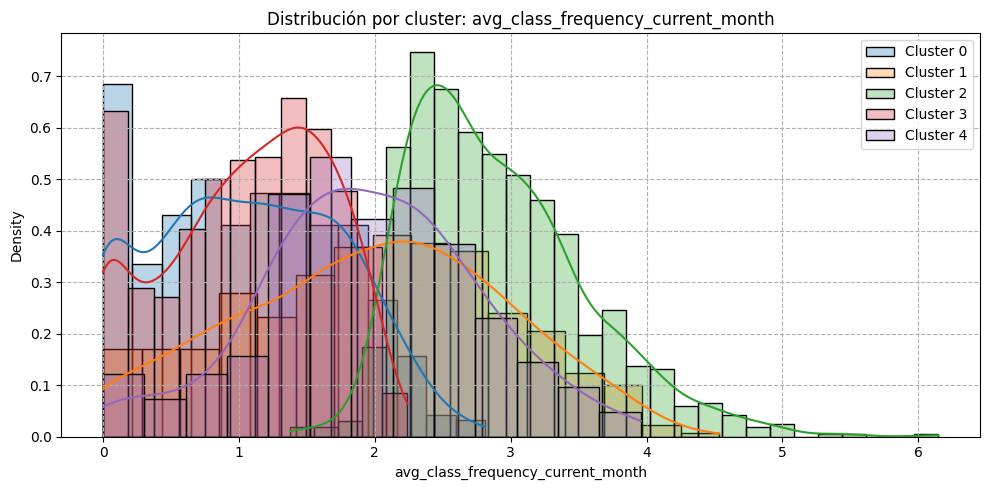

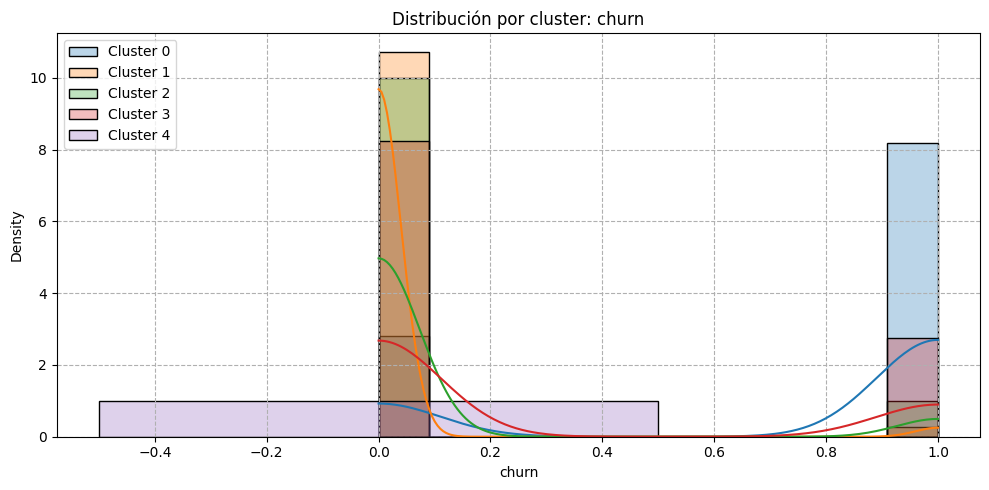

In [326]:
# Distribuciones por cluster y por caracteristica

for col in df.columns:
    if col not in ['cluster', 'Churn']:
        plt.figure(figsize=(10, 5))
        for i in range(5):  # para cada cluster
            sns.histplot(
                df[df['cluster'] == i][col],
                kde=True,
                stat='density',
                label=f'Cluster {i}',
                alpha=0.3
            )
        plt.title(f'Distribución por cluster: {col}')
        plt.legend()
        plt.grid(linestyle='--')
        plt.tight_layout()
        plt.show()


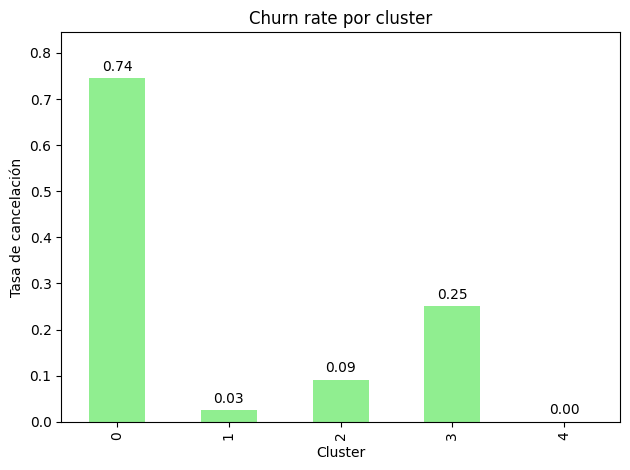

In [327]:
# Tasa de cancelación por cluster

df_churnrate_cluster = df.groupby('cluster')['churn'].mean()

ax = df_churnrate_cluster.plot(kind='bar', color='lightgreen')
plt.title('Churn rate por cluster')
plt.ylabel('Tasa de cancelación')
plt.xlabel('Cluster')

for i, value in enumerate(df_churnrate_cluster):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.ylim(0, df_churnrate_cluster.max() + 0.1) 
plt.tight_layout()
plt.show()

- El cluster 1 es el más alarmante en cuanto a cancelaciones, valdria la pena estudiar a profundidad a estos perfiles y ver si existe alguna estrategia para su retencion.

## Conclusiones

- Teniendo en cuenta que el cluster 1 es aquél con mayor probabilidad de cancelación, observemos sus puntos claves:

    - Observamos que son las personas que viven lejos del gimnasio
    - Son personas que no llegan por programas de partnership empresariales y similares
    - Son personas que no llegan por programa de referidos (amigos)
    - Son personas que suelen contratar suscripciones de poco tiempo (1 a 3 meses)
    - Son personas que no suelen estar en sesiones grupales
    - Son en su mayoría personas jóvenes (a comparación del resto del dataset, son los menores en su mayoria)
    - Son personas que, si consumen otros servicios dentro del gimnasio, no gastan mucho en ello.
    - Son personas que, derivado de sus suscripciones de poco tiempo, sus periodos están muy cerca de terminar constantemente.
    - Son personas que no visitan regularmente el gimnasio

Probablemente las recomendaciones irían por procurar hacer que la experiencia de "ir al gimnasio" sea más placentera para ellos, que no les moleste salir de casa (viviendo lejos) para atender a hacer ejercicio:

    - Valdría la pena ver si se pueden incorporar descuentos para gente que vive fuera de la cercanía del gimnasio (con identificaciones oficiales verificadas)
    - Ofrecerles beneficios si deciden adquirir una membresía de una duración de 6 meses o más.
    - Compartir cupones si asisten a 2 o más sesiones grupales cada semana.
    - Facilitar espacios donde la gente joven sienta que puede estar sin necesidad de estar haciendo ejercicio todo el tiempo, entretenimiento y comodidades para que puedan también hacer otros deberes (tareas y trabajo) dentro de las instalaciones del gimnasio; que no tengan que desplazarse a sus casas después de entrenar.
    - Derivado de ofrecer cupones/descuentos, debería también subir su monto gastado en servicios adicionales dentro del gimnasio (masajes, alimentos y bebidas...), asumiendo que sí les gustan los productos que se ofrecen.
    
- En general, ofrecer una experiencia que va más allá de ir a ejercitar y listo, procurar que sea un segundo hogar para este grupo en particular.